# Price Relative

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:price_relative

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = 'AAPL'
symbol2 = '^GSPC'
start = '2018-10-01'
end = '2019-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [3]:
df = pd.concat([df1['Adj Close'], df2['Adj Close']],axis=1)

In [4]:
# Rename columns
df.columns = [symbol1,symbol2]

In [5]:
df['Price Relative'] = df['AAPL']/df['^GSPC']
df['Percentage Change in Price Relative'] = ((df['Price Relative']-df['Price Relative'].shift())/df['Price Relative'].shift())*100

In [6]:
df.head()

,AAPL,^GSPC,Price Relative,Percentage Change in Price Relative
Date,,,,
2018-10-01,224.637604,2924.590088,0.076810,NaN
2018-10-02,226.634293,2923.429932,0.077523,0.928886
2018-10-03,229.392090,2925.510010,0.078411,1.144882
2018-10-04,225.359177,2901.610107,0.077667,-0.948891
2018-10-05,221.701859,2885.570068,0.076831,-1.076034


Text(0.5,0,'Date')

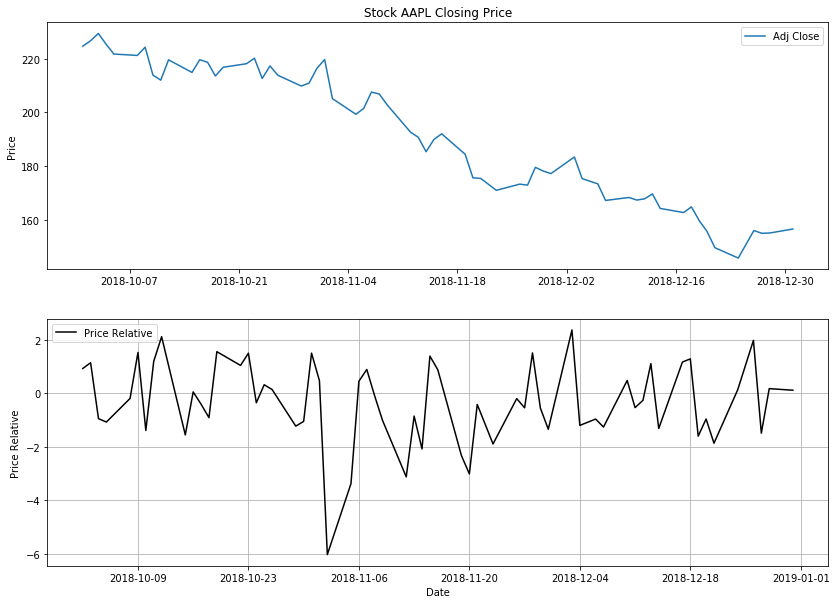

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Percentage Change in Price Relative'], label='Price Relative', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Price Relative')
ax2.set_xlabel('Date')

## Candlestick with Price Relative

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736968.0,227.949997,229.419998,226.350006,227.259995,224.637604,23600800,False
1,736969.0,227.250000,230.000000,226.630005,229.279999,226.634293,24788200,False
2,736970.0,230.050003,233.470001,229.779999,232.070007,229.392090,28654800,False
3,736971.0,230.779999,232.350006,226.729996,227.990005,225.359177,32042000,False
4,736972.0,227.960007,228.410004,220.580002,224.289993,221.701859,33580500,False


Text(0.5,0,'Date')

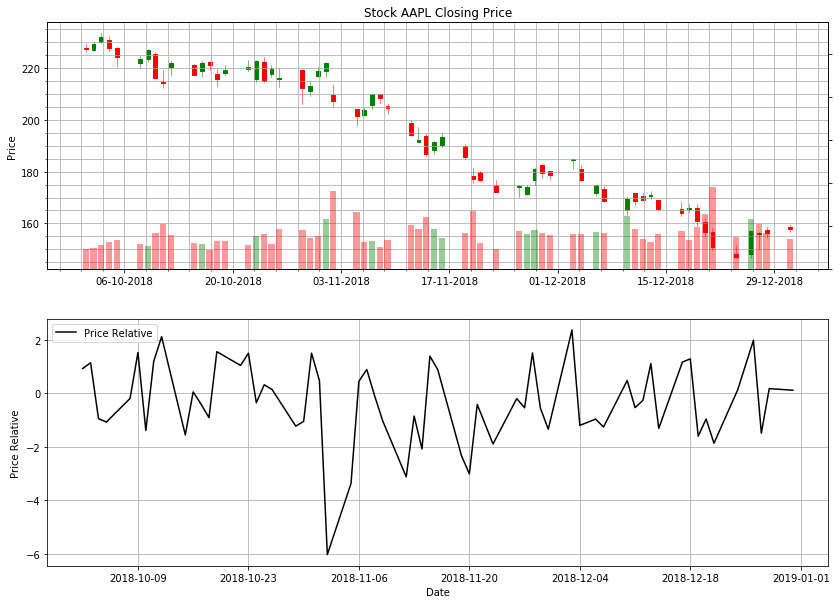

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Percentage Change in Price Relative'], label='Price Relative', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Price Relative')
ax2.set_xlabel('Date')